<a href="https://colab.research.google.com/github/ML-Guy/tutorials_transformers/blob/main/Transformer_Estimations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Transformer Arithmatics


- The total compute in floating point operations is approximately: $4(N^2)d + 3N^2$
  - **Attention Calculation** ($A = QK^T$): $2(N^2)d$ FLOPs -  
$Q$ and $K$ have dimensions $N \times d$, and their dot product requires $2N^2d$ floating point operations.
  - **Softmax Operation** $A = softmax(A)/sqrt(d_k)$:  $3N^2$ FLOPs -  
The attention matrix $A$ has size $N^2$. Calculating the exponent for each element requires $N^2$ FLOPs, and the normalization (sum and division across rows) requires an additional $2N^2$ FLOPs.
  - **Output Calculation** $O = A.V$: $2(N^2)d$ FLOPs -  
$A$ is of size $N \times N$ and $V$ is $N \times d$. The dot product between $A$ and $V$ takes $2N^2d$ FLOPs.


- The total memory movement in bytes is approximately: $8N^2 + 8Nd$
  - **Attention Calculation** $A = QK^T$:  4Nd + 2N^2 bytes -  
$Q$ and $K$, each of size $N \times d$, require $2Nd$ bytes each in FP16 precision. The resulting attention matrix $A$, of size $N^2$, takes $2N^2$ bytes.
  - **Softmax Operation** $A = softmax(A)/sqrt(d_k)$: 4N^2 bytes -  
The input and output of the softmax operation, both of size $N^2$, require $2N^2$ bytes each in FP16.
  - **Output Calculation** $O = AV$:  2N^2 + 4Nd bytes -  
The attention matrix $A$ of size $N^2$ requires $2N^2$ bytes, and the vectors $V$ and output $O$, both of size $N \times d$, require $2Nd$ bytes each.

- The arithmetic intensity is then calculated as: arithmetic_intensity = $(4(N^2)d + 3N^2) / (8N^2 + 8Nd)$

In [ ]:
# Given values
# Given values
N = 2048
d = 128

# Compute the numerator and denominator
numerator = 4 *N*N* d + 3*N*N
denominator = 8*N*N  + 8 *N* d

# Compute the result
result = numerator / denominator
result


60.588235294117645

In [ ]:
# Given values
N = 2048
d = 4096

# Compute the numerator and denominator
numerator = 4 *N*N* d + 3*N*N
denominator = 8*N*N  + 8 *N* d

# Compute the result
result = numerator / denominator
result

0.500091552734375

In [ ]:
N/d

16.0

In [ ]:
def estimate_cost_scaling():
  print(f"Model: {model} - GPU: {gpu}")

  gen_tokens = 4000
  for d in range(2, 30):
    batch_avail = min((d*80 - M)/cache_size,  CBratio)
    if batch_avail<1:
      continue
    t = M *gen_tokens/gpu_bandwidth/d/MFU
    tps = gen_tokens/t
    print(f"GPU Count: {d}, time {t}s, TPS : {tps}, batch scale: {int(batch_avail)} Cost: {1000000/tps*d*GPUCost}- {1000000/tps*d/batch_avail*GPUCost}")

In [ ]:
# H100
gpu = "H100"
gpu_bandwidth = 2000
MFU = 0.6
CBratio = 1500/2
GPUCost = 1/3600 #USD/sec

In [ ]:
# LLama 405B
model = "llama 405B"
M = 810 #GB model params
cache_size=2 #GB/input token

In [ ]:
estimate_cost_scaling()

Model: llama 405B - GPU: H100
GPU Count: 11, time 245.45454545454547s, TPS : 16.296296296296294, batch scale: 35 Cost: 187.50000000000003- 5.3571428571428585
GPU Count: 12, time 225.0s, TPS : 17.77777777777778, batch scale: 75 Cost: 187.5- 2.5
GPU Count: 13, time 207.6923076923077s, TPS : 19.25925925925926, batch scale: 115 Cost: 187.5- 1.6304347826086956
GPU Count: 14, time 192.85714285714286s, TPS : 20.74074074074074, batch scale: 155 Cost: 187.5- 1.2096774193548387
GPU Count: 15, time 180.0s, TPS : 22.22222222222222, batch scale: 195 Cost: 187.5- 0.9615384615384615
GPU Count: 16, time 168.75s, TPS : 23.703703703703702, batch scale: 235 Cost: 187.5- 0.797872340425532
GPU Count: 17, time 158.82352941176472s, TPS : 25.185185185185183, batch scale: 275 Cost: 187.50000000000003- 0.6818181818181819
GPU Count: 18, time 150.0s, TPS : 26.666666666666668, batch scale: 315 Cost: 187.5- 0.5952380952380952
GPU Count: 19, time 142.10526315789474s, TPS : 28.14814814814815, batch scale: 355 Cost: 1

In [ ]:
# LLama 70B
model = "llama 70B"
M = 140
cache_size=1.32

In [ ]:
estimate_cost_scaling()

Model: llama 70B - GPU: H100
GPU Count: 2, time 233.33333333333334s, TPS : 17.142857142857142, batch scale: 15 Cost: 32.40740740740741- 2.1388888888888893
GPU Count: 3, time 155.55555555555554s, TPS : 25.714285714285715, batch scale: 75 Cost: 32.40740740740741- 0.42777777777777787
GPU Count: 4, time 116.66666666666667s, TPS : 34.285714285714285, batch scale: 136 Cost: 32.40740740740741- 0.23765432098765435
GPU Count: 5, time 93.33333333333334s, TPS : 42.857142857142854, batch scale: 196 Cost: 32.40740740740741- 0.16452991452991456
GPU Count: 6, time 77.77777777777777s, TPS : 51.42857142857143, batch scale: 257 Cost: 32.40740740740741- 0.1258169934640523
GPU Count: 7, time 66.66666666666667s, TPS : 59.99999999999999, batch scale: 318 Cost: 32.40740740740741- 0.10185185185185186
GPU Count: 8, time 58.333333333333336s, TPS : 68.57142857142857, batch scale: 378 Cost: 32.40740740740741- 0.08555555555555557
GPU Count: 9, time 51.851851851851855s, TPS : 77.14285714285714, batch scale: 439 Cos

In [ ]:
# LLama 8B
model = "llama 8B"
M = 16
cache_size=0.53

In [ ]:
estimate_cost_scaling()

Model: llama 8B - GPU: H100
GPU Count: 2, time 26.666666666666668s, TPS : 150.0, batch scale: 271 Cost: 3.7037037037037037- 0.013631687242798354
GPU Count: 3, time 17.77777777777778s, TPS : 225.0, batch scale: 422 Cost: 3.7037037037037033- 0.008763227513227513
GPU Count: 4, time 13.333333333333334s, TPS : 300.0, batch scale: 573 Cost: 3.7037037037037037- 0.00645711500974659
GPU Count: 5, time 10.666666666666668s, TPS : 374.99999999999994, batch scale: 724 Cost: 3.703703703703704- 0.005111882716049384
GPU Count: 6, time 8.88888888888889s, TPS : 450.0, batch scale: 750 Cost: 3.7037037037037033- 0.004938271604938271
GPU Count: 7, time 7.619047619047619s, TPS : 525.0, batch scale: 750 Cost: 3.7037037037037037- 0.0049382716049382715
GPU Count: 8, time 6.666666666666667s, TPS : 600.0, batch scale: 750 Cost: 3.7037037037037037- 0.0049382716049382715
GPU Count: 9, time 5.925925925925926s, TPS : 675.0, batch scale: 750 Cost: 3.7037037037037037- 0.0049382716049382715
GPU Count: 10, time 5.333333

In [ ]:
# H100
gpu = "H100"
gpu_bandwidth = 2000
MFU = 0.6
CBratio = 1500/2

In [ ]:
# LLama 405B
model = "llama 405B"
M = 810
cache_size=2

In [ ]:
estimate_cost_scaling()

Model: llama 405B - GPU: H100
GPU Count: 11, time 245.45454545454547s, TPS : 16.296296296296294, batch scale: 35 Cost: 675000.0000000001- 19285.71428571429
GPU Count: 12, time 225.0s, TPS : 17.77777777777778, batch scale: 75 Cost: 675000.0- 9000.0
GPU Count: 13, time 207.6923076923077s, TPS : 19.25925925925926, batch scale: 115 Cost: 675000.0- 5869.565217391304
GPU Count: 14, time 192.85714285714286s, TPS : 20.74074074074074, batch scale: 155 Cost: 675000.0- 4354.8387096774195
GPU Count: 15, time 180.0s, TPS : 22.22222222222222, batch scale: 195 Cost: 675000.0- 3461.5384615384614
GPU Count: 16, time 168.75s, TPS : 23.703703703703702, batch scale: 235 Cost: 675000.0- 2872.340425531915
GPU Count: 17, time 158.82352941176472s, TPS : 25.185185185185183, batch scale: 275 Cost: 675000.0000000001- 2454.545454545455
GPU Count: 18, time 150.0s, TPS : 26.666666666666668, batch scale: 315 Cost: 675000.0- 2142.8571428571427
GPU Count: 19, time 142.10526315789474s, TPS : 28.14814814814815, batch sc

In [ ]:
# LLama 70B
model = "llama 70B"
M = 140
cache_size=1.32

In [ ]:
estimate_cost_scaling()

Model: llama 70B - GPU: H100
GPU Count: 2, time 233.33333333333334s, TPS : 17.142857142857142, batch scale: 15 Cost: 116666.66666666667- 7700.000000000001
GPU Count: 3, time 155.55555555555554s, TPS : 25.714285714285715, batch scale: 75 Cost: 116666.66666666667- 1540.0000000000002
GPU Count: 4, time 116.66666666666667s, TPS : 34.285714285714285, batch scale: 136 Cost: 116666.66666666667- 855.5555555555557
GPU Count: 5, time 93.33333333333334s, TPS : 42.857142857142854, batch scale: 196 Cost: 116666.66666666669- 592.3076923076924
GPU Count: 6, time 77.77777777777777s, TPS : 51.42857142857143, batch scale: 257 Cost: 116666.66666666667- 452.9411764705883
GPU Count: 7, time 66.66666666666667s, TPS : 59.99999999999999, batch scale: 318 Cost: 116666.66666666667- 366.6666666666667
GPU Count: 8, time 58.333333333333336s, TPS : 68.57142857142857, batch scale: 378 Cost: 116666.66666666667- 308.00000000000006
GPU Count: 9, time 51.851851851851855s, TPS : 77.14285714285714, batch scale: 439 Cost: 

In [ ]:
# LLama 8B
model = "llama 8B"
M = 16
cache_size=0.53

In [ ]:
estimate_cost_scaling()

Model: llama 8B - GPU: H100
GPU Count: 2, time 26.666666666666668s, TPS : 150.0, batch scale: 271 Cost: 13333.333333333334- 49.074074074074076
GPU Count: 3, time 17.77777777777778s, TPS : 225.0, batch scale: 422 Cost: 13333.333333333332- 31.547619047619044
GPU Count: 4, time 13.333333333333334s, TPS : 300.0, batch scale: 573 Cost: 13333.333333333334- 23.245614035087723
GPU Count: 5, time 10.666666666666668s, TPS : 374.99999999999994, batch scale: 724 Cost: 13333.333333333336- 18.402777777777782
GPU Count: 6, time 8.88888888888889s, TPS : 450.0, batch scale: 750 Cost: 13333.333333333332- 17.777777777777775
GPU Count: 7, time 7.619047619047619s, TPS : 525.0, batch scale: 750 Cost: 13333.333333333334- 17.77777777777778
GPU Count: 8, time 6.666666666666667s, TPS : 600.0, batch scale: 750 Cost: 13333.333333333334- 17.77777777777778
GPU Count: 9, time 5.925925925925926s, TPS : 675.0, batch scale: 750 Cost: 13333.333333333334- 17.77777777777778
GPU Count: 10, time 5.333333333333334s, TPS : 74

Model: llama 405B, Processing GPU: H100
GPU Count: 11, Time: 246.06060606060606s, TPS: 16.25615763546798, Batch Scale: 35, Cost: 187.962962962963, Cost Max Batch: 5.820105820105821
GPU Count: 12, Time: 225.55555555555554s, TPS: 17.733990147783253, Batch Scale: 46, Cost: 187.96296296296293, Cost Max Batch: 4.462962962962962
GPU Count: 13, Time: 208.2051282051282s, TPS: 19.211822660098523, Batch Scale: 46, Cost: 187.96296296296296, Cost Max Batch: 4.462962962962963
GPU Count: 14, Time: 193.33333333333334s, TPS: 20.689655172413794, Batch Scale: 46, Cost: 187.962962962963, Cost Max Batch: 4.462962962962964
GPU Count: 15, Time: 180.44444444444446s, TPS: 22.167487684729064, Batch Scale: 46, Cost: 187.96296296296296, Cost Max Batch: 4.462962962962963
GPU Count: 16, Time: 169.16666666666666s, TPS: 23.645320197044338, Batch Scale: 46, Cost: 187.96296296296296, Cost Max Batch: 4.462962962962963
GPU Count: 17, Time: 159.2156862745098s, TPS: 25.123152709359605, Batch Scale: 46, Cost: 187.962962962

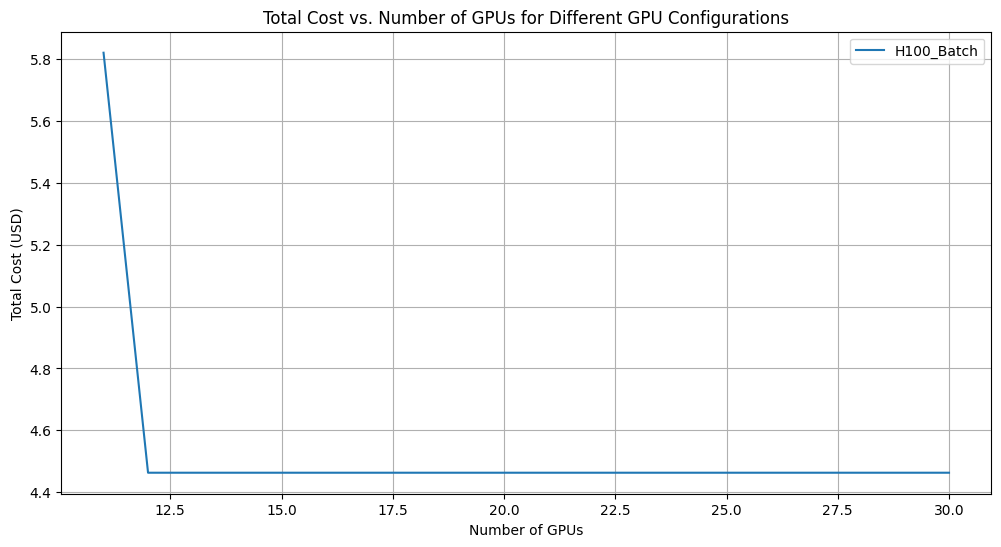

In [ ]:
import matplotlib.pyplot as plt
from dataclasses import dataclass

@dataclass
class GPUConfig:
    name: str = "H100"
    memory:float = 80  # GB
    bandwidth: float = 2000  # GB/s
    compute: float = 1500   # TFlops
    cost_per_sec: float = 1/3600  # USD/s
    mfu = 0.6  # Memory Fragmentation Utilization
    cb_ratio = 1000 # TFlops/bandwidth

    def __post_init__(self):
        self.cb_ratio = 1000 * self.compute / self.bandwidth

@dataclass
class Model:
    name = "llama 405B"
    model_size = 810  # GB
    cache_size = 2  # GB per input
    cb_factor = 128/8

gen_tokens = 4000
max_gpus = 30

def calculate_cost_scaling(gpu, model, context_size=4_000, max_gpus = 30, total_tokens=1_000_000):
    results = []
    for d in range(2, max_gpus + 1):
        batch_avail = min((d * gpu.memory - model.model_size) / model.cache_size, gpu.cb_ratio/model.cb_factor)
        if batch_avail < 1:
            continue

        # Time required to process tokens on d GPU
        t = ((model.model_size + model.cache_size) * context_size) / (gpu.bandwidth * d * gpu.mfu)
        tmax = ((model.model_size + batch_avail* model.cache_size) * context_size) / (gpu.bandwidth * d * gpu.mfu)
        tps = context_size / t

        # Cost calculations
        cost_per_gpu = (total_tokens / tps) * gpu.cost_per_sec
        total_cost = cost_per_gpu * d
        cost_max_batch = total_cost / batch_avail/t*tmax


        results.append({
            'gpu_count': d,
            'time': t,
            'tps': tps,
            'batch_scale': int(batch_avail),
            'cost': total_cost,
            'cost_max_batch': cost_max_batch
        })
        print(f"GPU Count: {d}, Time: {t}s, TPS: {tps}, Batch Scale: {int(batch_avail)}, Cost: {total_cost}, Cost Max Batch: {cost_max_batch}")

    return results

def plot_results(gpu_configs, model):
    plt.figure(figsize=(12, 6))

    for gpu_config in gpu_configs:
        print(f"Model: {model.name}, Processing GPU: {gpu_config.name}")
        results = calculate_cost_scaling(gpu_config, model)
        gpu_counts = [result['gpu_count'] for result in results]
        costs = [result['cost'] for result in results]
        cost_max_batch = [result['cost_max_batch'] for result in results]

        # plt.plot(gpu_counts, costs, label=gpu_config.name )
        plt.plot(gpu_counts, cost_max_batch, label=gpu_config.name + "_Batch")

    plt.xlabel('Number of GPUs')
    plt.ylabel('Total Cost (USD)')
    plt.title('Total Cost vs. Number of GPUs for Different GPU Configurations')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define GPU configurations
gpu_configs = [
    GPUConfig(name='H100', bandwidth=2000, cost_per_sec=1/3600),
    # GPUConfig(name='A100', bandwidth=1550, cost_per_sec=0.9/3600)  # Example config
]


# Plot results
plot_results(gpu_configs, Model)


In [ ]:
from dataclasses import dataclass

@dataclass
class GPUConfig:
    name: str
    memory: float  # GB
    bandwidth: float  # GB/s
    compute: float  # TFlops
    cost_per_sec: float  # USD/s
    mfu: float  # Memory Fragmentation Utilization

    def __post_init__(self):
        self.cb_ratio = 1000 * self.compute/ self.bandwidth

In [ ]:
gpu_configs = [
    # H100 Configuration
    GPUConfig(
        name="H100",
        memory=80,
        bandwidth=2000,
        compute=1500,
        cost_per_sec=2.69 / 3600,  # USD/s
        mfu=0.6
    ),
    # A100 (40GB) Configuration
    GPUConfig(
        name="A100",
        memory=40,
        bandwidth=1555,
        compute=312,
        cost_per_sec=1.19 / 3600,  # USD/s
        mfu=0.7
    ),
    # V100 Configuration
    GPUConfig(
        name="V100",
        memory=32,
        bandwidth=900,
        compute=125,
        cost_per_sec=3.06 / 3600,  # USD/s
        mfu=0.8
    ),
    # L40 Configuration
    GPUConfig(
        name="L40",
        memory=48,
        bandwidth=1152,
        compute=114,
        cost_per_sec=0.99 / 3600,  # USD/s
        mfu=0.65
    ),
    # T4 Configuration
    GPUConfig(
        name="T4",
        memory=16,
        bandwidth=320,
        compute=8.1,
        cost_per_sec=0.75 / 3600,  # USD/s
        mfu=0.75
    ),
    # A40 Configuration
    GPUConfig(
        name="A40",
        memory=48,
        bandwidth=696,
        compute=37.4,
        cost_per_sec=0.35 / 3600,  # USD/s
        mfu=0.7
    ),
    # A10 Configuration
    GPUConfig(
        name="A10",
        memory=24,
        bandwidth=600,
        compute=31.2,
        cost_per_sec=1.50 / 3600,  # USD/s
        mfu=0.65
    )
]

Model: llama 405B, Processing GPU: H100
GPU Count: 11, Time: 246.06060606060606s, TPS: 16.25615763546798, Batch Scale: 35, Cost: 505.62037037037044, Cost Max Batch: 15.65608465608466
GPU Count: 12, Time: 225.55555555555554s, TPS: 17.733990147783253, Batch Scale: 46, Cost: 505.6203703703704, Cost Max Batch: 12.00537037037037
GPU Count: 13, Time: 208.2051282051282s, TPS: 19.211822660098523, Batch Scale: 46, Cost: 505.6203703703703, Cost Max Batch: 12.00537037037037
GPU Count: 14, Time: 193.33333333333334s, TPS: 20.689655172413794, Batch Scale: 46, Cost: 505.62037037037044, Cost Max Batch: 12.00537037037037
GPU Count: 15, Time: 180.44444444444446s, TPS: 22.167487684729064, Batch Scale: 46, Cost: 505.6203703703704, Cost Max Batch: 12.00537037037037
GPU Count: 16, Time: 169.16666666666666s, TPS: 23.645320197044338, Batch Scale: 46, Cost: 505.6203703703704, Cost Max Batch: 12.00537037037037
GPU Count: 17, Time: 159.2156862745098s, TPS: 25.123152709359605, Batch Scale: 46, Cost: 505.620370370

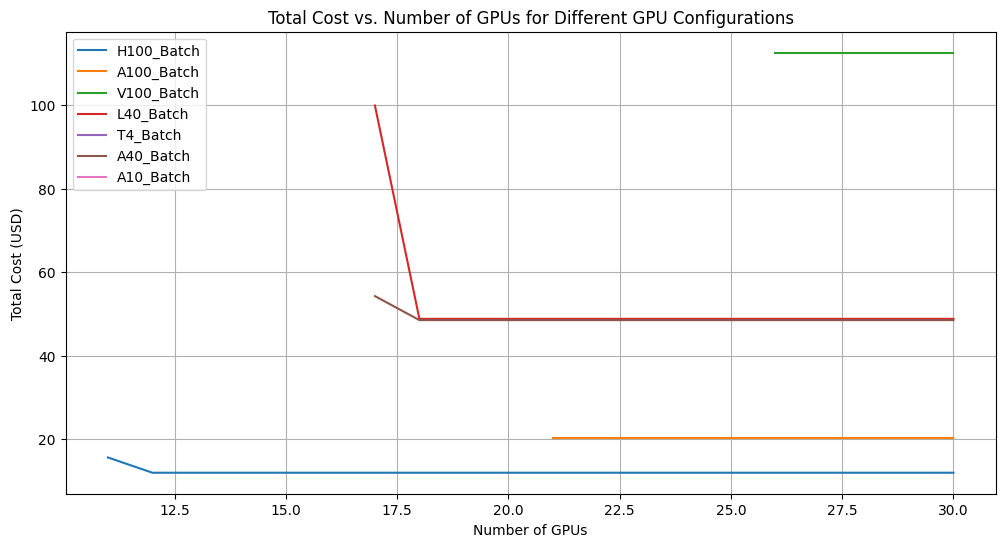

In [ ]:
@dataclass
class Model:
    name = "llama 405B"
    model_size = 810  # GB
    cache_size = 2  # GB per input
    cb_factor = 128/8
plot_results(gpu_configs, Model)

Model: llama 70B, Processing GPU: H100
GPU Count: 2, Time: 235.53333333333333s, TPS: 16.982734220209455, Batch Scale: 15, Cost: 87.99787037037036, Cost Max Batch: 6.575555555555556
GPU Count: 3, Time: 157.0222222222222s, TPS: 25.47410133031418, Batch Scale: 75, Cost: 87.99787037037038, Cost Max Batch: 1.9726666666666672
GPU Count: 4, Time: 117.76666666666667s, TPS: 33.96546844041891, Batch Scale: 93, Cost: 87.99787037037036, Cost Max Batch: 1.751820987654321
GPU Count: 5, Time: 94.21333333333334s, TPS: 42.456835550523635, Batch Scale: 93, Cost: 87.99787037037036, Cost Max Batch: 1.751820987654321
GPU Count: 6, Time: 78.5111111111111s, TPS: 50.94820266062836, Batch Scale: 93, Cost: 87.99787037037038, Cost Max Batch: 1.7518209876543211
GPU Count: 7, Time: 67.29523809523809s, TPS: 59.439569770733094, Batch Scale: 93, Cost: 87.99787037037036, Cost Max Batch: 1.7518209876543211
GPU Count: 8, Time: 58.88333333333333s, TPS: 67.93093688083782, Batch Scale: 93, Cost: 87.99787037037036, Cost Max

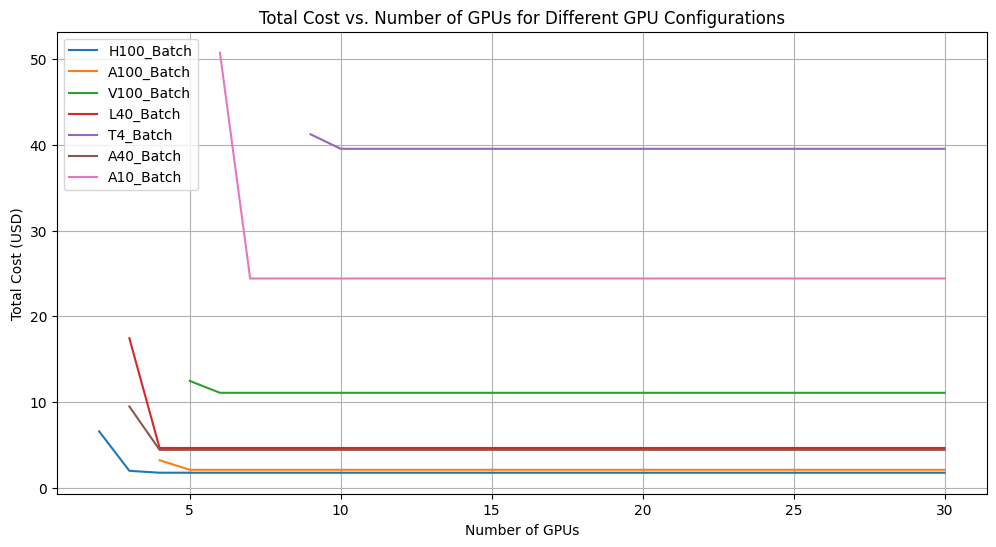

In [ ]:
@dataclass
class Model:
    name = "llama 70B"
    model_size = 140  # GB
    cache_size = 1.32  # GB per input
    cb_factor = 64/8

plot_results(gpu_configs, Model)

Model: llama 8B, Processing GPU: H100
GPU Count: 2, Time: 27.55s, TPS: 145.19056261343013, Batch Scale: 187, Cost: 10.292986111111112, Cost Max Batch: 0.38315895061728394
GPU Count: 3, Time: 18.366666666666667s, TPS: 217.7858439201452, Batch Scale: 187, Cost: 10.292986111111112, Cost Max Batch: 0.383158950617284
GPU Count: 4, Time: 13.775s, TPS: 290.38112522686026, Batch Scale: 187, Cost: 10.292986111111112, Cost Max Batch: 0.38315895061728394
GPU Count: 5, Time: 11.02s, TPS: 362.97640653357536, Batch Scale: 187, Cost: 10.29298611111111, Cost Max Batch: 0.383158950617284
GPU Count: 6, Time: 9.183333333333334s, TPS: 435.5716878402904, Batch Scale: 187, Cost: 10.292986111111112, Cost Max Batch: 0.383158950617284
GPU Count: 7, Time: 7.871428571428571s, TPS: 508.1669691470055, Batch Scale: 187, Cost: 10.29298611111111, Cost Max Batch: 0.38315895061728394
GPU Count: 8, Time: 6.8875s, TPS: 580.7622504537205, Batch Scale: 187, Cost: 10.292986111111112, Cost Max Batch: 0.38315895061728394
GPU 

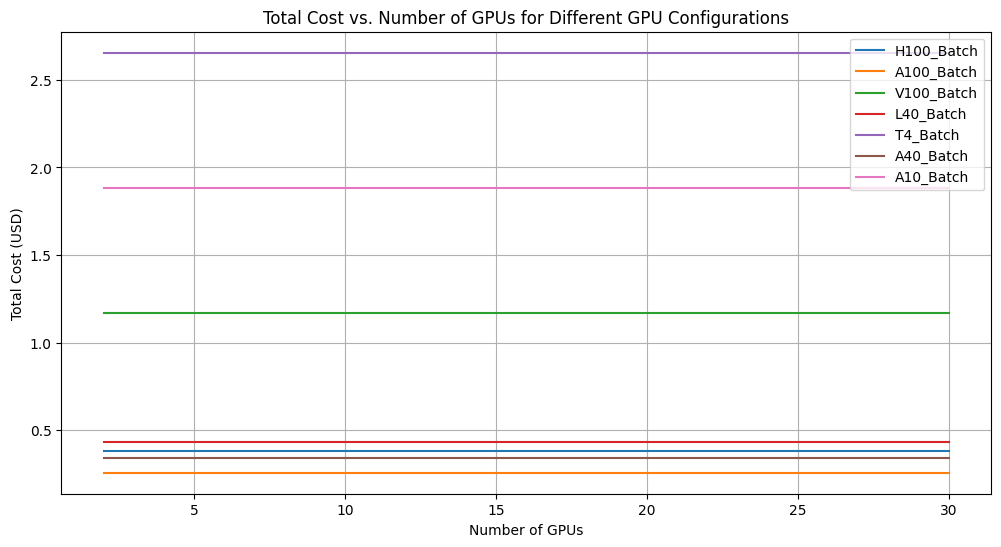

In [ ]:

@dataclass
class Model:
    name = "llama 8B"
    model_size = 16  # GB
    cache_size = 0.53  # GB per input
    cb_factor = 32/8

plot_results(gpu_configs, Model)